# Decision Trees and Random Forests

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Get the Data

In [22]:
df = pd.read_csv('/content/kyphosis(1).csv')

In [23]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Trees

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction and Evaluation

In [30]:
predictions = dtree.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.88      0.78      0.82        18
     present       0.56      0.71      0.63         7

    accuracy                           0.76        25
   macro avg       0.72      0.75      0.72        25
weighted avg       0.79      0.76      0.77        25



In [40]:
print(confusion_matrix(y_test,predictions))

[[14  4]
 [ 2  5]]


# Tree Visualization

In [41]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

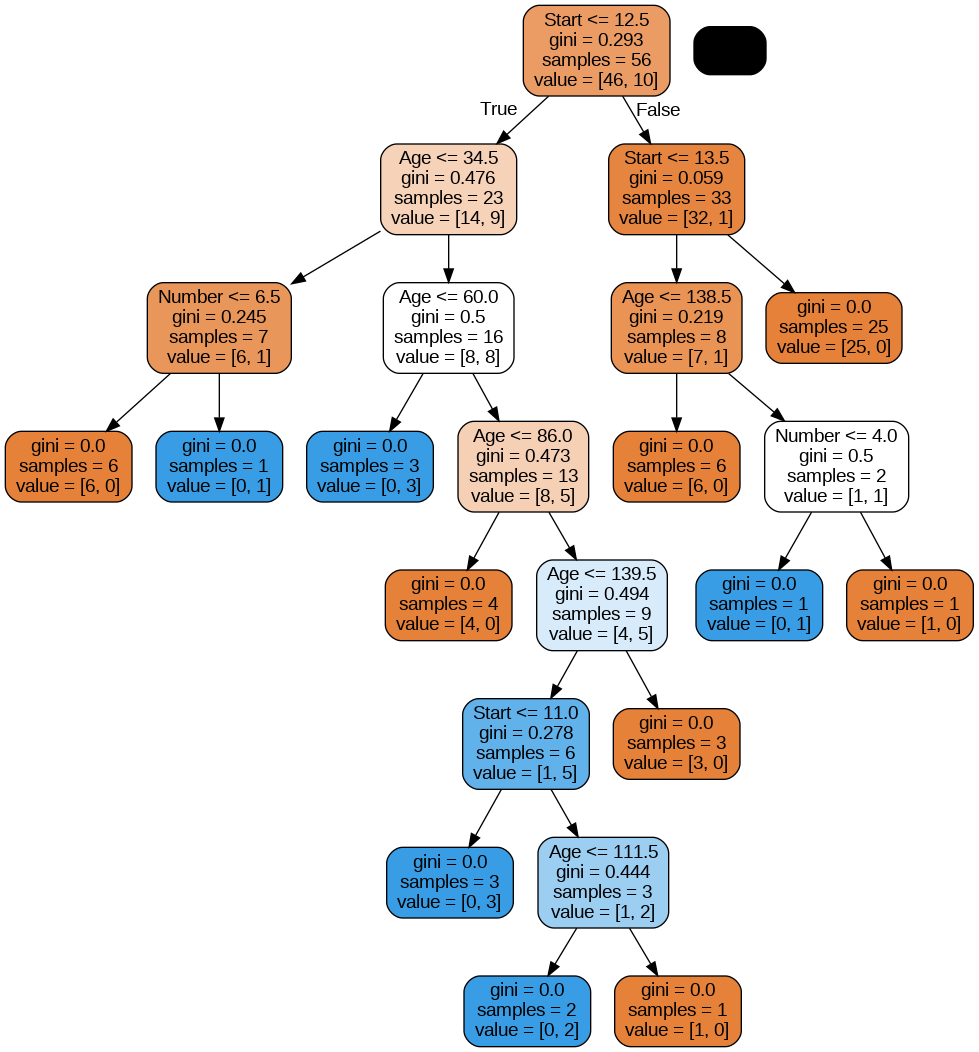

In [42]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Random Forests

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
rfc_pred = rfc.predict(X_test)

In [45]:
print(confusion_matrix(y_test,rfc_pred))

[[16  2]
 [ 5  2]]


In [46]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.76      0.89      0.82        18
     present       0.50      0.29      0.36         7

    accuracy                           0.72        25
   macro avg       0.63      0.59      0.59        25
weighted avg       0.69      0.72      0.69        25



# Pronto!